#### From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import argparse
from selenium.webdriver.support.select import Select

driver = webdriver.Chrome(executable_path = "C:/Users/des/Downloads/chromedriver")
driver.get('https://www.instagram.com/')
waiter=WebDriverWait(driver,10).until(EC.presence_of_element_located((By.NAME,"username")))
usernametext=driver.find_element_by_name('username')
passwordtext=driver.find_element_by_name('password')
usernametext.send_keys('SAMPLE_USERNAME')
passwordtext.send_keys('SAMPLE_PASSWORD')
log_in=driver.find_element_by_class_name('L3NKy')
log_in.click()

In [5]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class, "sqdOP")]')))
driver.find_element_by_class_name("cmbtv").click()


In [6]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//button[contains(@class, "HoLwm")]')))
driver.find_element_by_class_name("HoLwm").click()


In [67]:
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH,'//span[contains(@class, "TqC_a")]')))
time.sleep(2)
driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys('food')
WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//span[@class="Ap253"]')))
time.sleep(3)
count=0
users=[]
links={}
baseurl='https//www.instagram.com/'
for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
    user_n=i.get_attribute('innerHTML')
    if user_n[0]!='#' and count<10:
        users.append(i.get_attribute('innerHTML'))
        count+=1
        data=i.get_attribute('innerHTML')
        data=baseurl+data+'/'
        links[i.get_attribute('innerHTML')]=data
driver.find_element_by_xpath('//div[contains(@class, "coreSpriteSearchClear")]').click()
followers=[]
for user in users:
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    text=driver.find_element_by_xpath('//span[@class="Ap253"]')
    if(user==text.get_attribute('innerHTML')):
        text.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//a[@class="-nal3 "]/span[@class="g47SY "]')))
        followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
        time.sleep(3.2)
    else:
        for i in driver.find_elements_by_xpath('//span[@class="Ap253"]'):
            x=i.get_attribute('innerHTML')
            if(x==user):
                i.click()
                time.sleep(2)
                followers.append(driver.find_element_by_xpath('//a[@class="-nal3 "]/span[@class="g47SY "]').get_attribute('innerHTML'))
                time.sleep(3.2)
                break

In [68]:
result={}
print(type(followers))
for i in range(10):
    if 'k' in followers[i]:
        followers[i]=float(followers[i][:-1])*1000
    else:
        followers[i]=int("".join(followers[i].split(',')))
for i in range(10):
    result[users[i]]=followers[i]
print(result)
print(users)
print(followers)

<class 'list'>
{'dilsefoodie': 535000.0, 'food_gambler': 97500.0, 'foodkaseries': 4885, 'foodierasleen': 8187, 'foodiesince96': 251000.0, 'kitchensuroor': 1781, 'food': 51200.0, 'whaaatislife': 72300.0, 'food_lunatic': 86300.0, 'delhifoodie': 10500.0}
['dilsefoodie', 'food_gambler', 'foodkaseries', 'foodierasleen', 'foodiesince96', 'kitchensuroor', 'food', 'whaaatislife', 'food_lunatic', 'delhifoodie']
[535000.0, 97500.0, 4885, 8187, 251000.0, 1781, 51200.0, 72300.0, 86300.0, 10500.0]


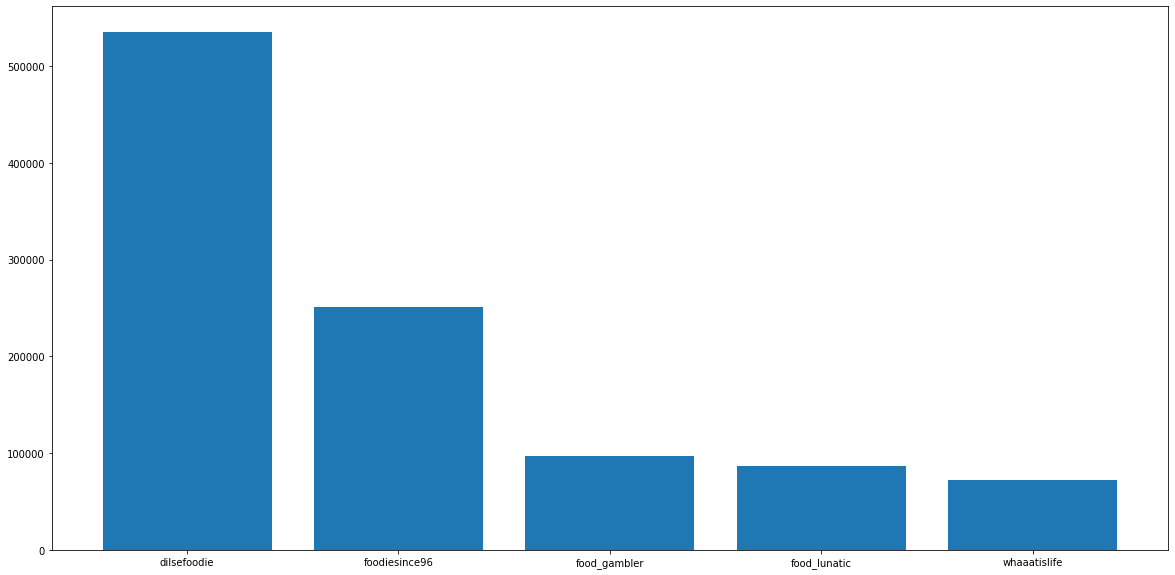

In [70]:
result=dict(sorted(result.items(),key=operator.itemgetter(1),reverse=True))
topuser=[]
theirfollowers=[]
j=0
for k in result.keys():
    if(j<5):
        topuser.append(k)
        theirfollowers.append(result[k])
        j=j+1
plt.figure(figsize=(20,10))
plt.bar(topuser,theirfollowers)
plt.show()

#### Now Find the number of posts these handles have done in the previous 3 days

In [71]:
driver.find_element_by_class_name("s4Iyt").click()
no_of_posts=[]
for user in topuser:
    time.sleep(3)
    print(user, end=' ')
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        time_string=driver.find_element_by_xpath('//time[contains(@class, "Nzb55")]').get_attribute('innerHTML')
        if time_string[-1] in ['h', 's']:
            count+=1
        elif time_string[-1]=='d' and int(time_string[:-1])<=3:
            count+=1
        else:
            driver.back()
            break
        driver.back()
        time.sleep(1)
    print("have done", count, "posts in past 3 days")
    no_of_posts.append(count)

dilsefoodie have done 3 posts in past 3 days
foodiesince96 have done 8 posts in past 3 days
food_gambler have done 12 posts in past 3 days
food_lunatic have done 7 posts in past 3 days
whaaatislife have done 8 posts in past 3 days


### visualization through plot

<Figure size 432x288 with 0 Axes>

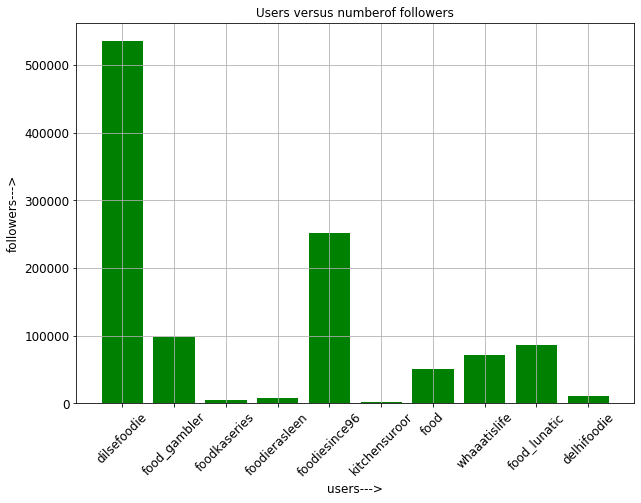

<Figure size 432x288 with 0 Axes>

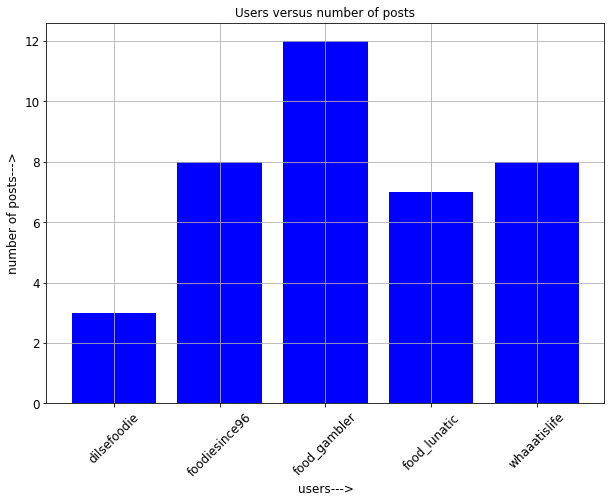

In [73]:
plt.subplots(0, 0)
plt.figure(figsize=(10, 7))
plt.bar(users, followers, color='green')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus numberof followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
plt.grid()
plt.show()

#graph between top 5 users and the number of posts
plt.subplots(0, 1)
plt.figure(figsize=(10, 7))
plt.bar(topuser, no_of_posts, color='blue')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

#### Open the top 5 handles , and scrape the content of the first 10 posts of each handle.

In [76]:
driver.find_element_by_class_name("s4Iyt").click()
time.sleep(2)
content=[]
hashtags=[]
for user in topuser:
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "C4VMK")]')))
        content.append(driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span').get_attribute('textContent'))
        for hashes in driver.find_elements_by_xpath('//div[contains(@class, "C4VMK")]/span/a'):
            hashtags.append(hashes.get_attribute('innerHTML'))
        count+=1
        if count>=10:
            driver.back()
            break
        driver.back()
        time.sleep(1)
for i in content:
    print(i)
    print("///////////////////////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\")


Ye Wali Maggi Taste Kari Hai ?If Yes Then Share Your Reviews#dilsefoodie
///////////////////////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Dwarka Ke Famous Chur Chur NaanAapne Khaye Hai Yaha Kabhi ?Raju Chur Chur Naan #dilsefoodie
///////////////////////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Happy Spicy Tawa At Rajouri gardenHave You Been To This Place ?#dilsefoodie
///////////////////////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\
100years Old Fruit Chaat WalaIt's In Mayapuri Industrial Area Just Outside Of Khalsa Restaurant. You Have To Wait Minimum 30mins For Your Turn #dilsefoodie #healthy #fruitsalad
///////////////////////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Chicken Salami Salad At Sandy Egg Near Rana Pratap BaghAmazing Food At This Sandy Stall #dilsefoodie
///////////////////////////////////////////////////\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Best Place In Nehru Place To Have Chicken Rice And Chinese PlatterSnack Junction 

#### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [77]:
hashtags=np.array(hashtags)
hash_tags=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
for i in hashtags:
    if not i[0]=='@' and i!='':
        hash_tags.append(i)
res={}
for i in hash_tags:
    if i in res.keys():
        res[i]+=1
    else:
        res[i]=1
res


{'#dilsefoodie': 10,
 '#healthy': 2,
 '#fruitsalad': 1,
 '#callofdutymobile': 1,
 '#coronavirus': 1,
 '#indianmatchmaking': 1,
 '#foodiesince96': 4,
 '#MangoSeason': 1,
 '#maggi': 2,
 '#cheese': 2,
 '#cheeselover': 1,
 '#maggie': 1,
 '#maggilover': 1,
 '#tasty': 5,
 '#yum': 1,
 '#yummy': 4,
 '#instafood': 3,
 '#instadaily': 1,
 '#foodie': 4,
 '#foodofindia': 1,
 '#foodphotography': 16,
 '#foodtsagram': 1,
 '#eeeeeats': 5,
 '#food': 14,
 '#foodporn': 3,
 '#delhi': 23,
 '#india': 3,
 '#foodtalkindia': 19,
 '#indianfood': 20,
 '#sodelhi': 2,
 '#newdelhi': 1,
 '#breakfast': 3,
 '#breakfastgoals': 1,
 '#foodstyling': 1,
 '#foodofmumbai': 1,
 '#mumbaifood': 4,
 '#bloggerofindia': 1,
 '#tasteofindia': 6,
 '#indianfoodie': 15,
 '#delhifoodie': 14,
 '#mumbaifoodlover': 1,
 '#delhifoodlover': 1,
 '#buzfeast': 1,
 '#gurgaon': 1,
 '#foodoftheday': 7,
 '#foodgasm': 5,
 '#delhi_igers': 11,
 '#feedfeed': 4,
 '#Repost': 2,
 '#loveeatrepeatt': 1,
 '#foodblogger': 1,
 '#delicious': 2,
 '#foodstagram': 5

#### Create a csv file with two columns : the word and its frequency

In [78]:
hash_word=np.array([i[1:] for i in res.keys()])
frequency=np.array([i for i in res.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Hashtag_FrequencyTABLE.csv')

#### Find the hashtags that were most popular among these bloggers

In [79]:
hash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print(hash_word[i], " has appeared ", frequency[i], " times")


delhifoodblogger  has appeared  24  times
delhi  has appeared  23  times
indianfood  has appeared  20  times
indianfoodbloggers  has appeared  20  times
foodtalkindia  has appeared  19  times
delhidiaries  has appeared  18  times
foodphotography  has appeared  16  times
indianfoodie  has appeared  15  times
food  has appeared  14  times
delhifoodie  has appeared  14  times
delhi_igers  has appeared  11  times
foodiesofindia  has appeared  11  times
foodcoma  has appeared  11  times
foodlovers  has appeared  11  times
foodbloggers  has appeared  11  times
delhifood  has appeared  10  times
delhiblogger  has appeared  10  times
comfortfood  has appeared  10  times
foodphoto  has appeared  10  times
foodforthought  has appeared  10  times
omnomnom  has appeared  10  times
dilsefoodie  has appeared  10  times
foodiesofinsta  has appeared  9  times
eatingforinsta  has appeared  9  times
spicy  has appeared  8  times
goals  has appeared  7  times
shotoniphone  has appeared  7  times
foodofth

pancakes  has appeared  1  times
brunch  has appeared  1  times
bananachocolate  has appeared  1  times
macncheese  has appeared  1  times
hot  has appeared  1  times
burritos  has appeared  1  times
glendale  has appeared  1  times
steak  has appeared  1  times
antalya  has appeared  1  times
kebap  has appeared  1  times
kebab  has appeared  1  times
lockdown  has appeared  1  times
pridemonth  has appeared  1  times
Throwback  has appeared  1  times
loveislove  has appeared  1  times
thickshakes  has appeared  1  times
tandoori  has appeared  1  times
weather  has appeared  1  times
rain  has appeared  1  times
pleasant  has appeared  1  times
rainy  has appeared  1  times
CountdownBegins  has appeared  1  times
countdown  has appeared  1  times
birthday  has appeared  1  times
kidsofinstagram  has appeared  1  times
birthdaycake  has appeared  1  times
eastdelhi  has appeared  1  times
italian  has appeared  1  times
tikka  has appeared  1  times
paneer  has appeared  1  times
shak

#### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

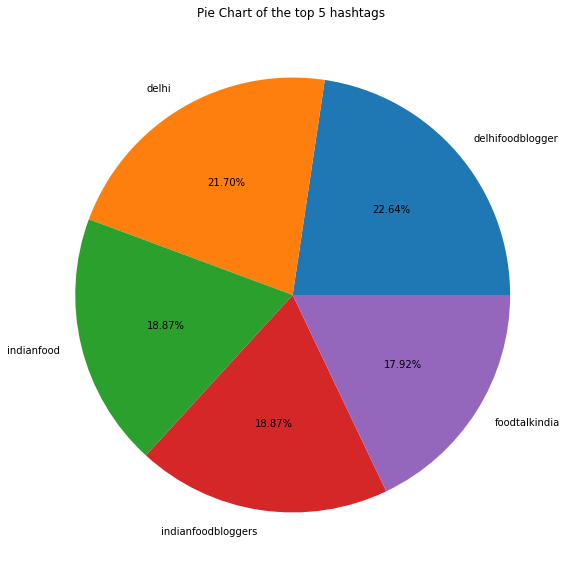

In [80]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%')
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

#### Find out the likes of the top 10 posts of the top 5 handles obtained earlier.

In [97]:
driver.find_element_by_class_name("s4Iyt").click()
like=[]
for user in topuser:
    print(user, end=" HAS ")
    time.sleep(3)
    driver.find_element_by_xpath('//span[contains(@class, "TqC_a")]').click()
    driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]').send_keys(user)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//span[@class='Ap253']")))
    driver.find_element_by_xpath('//span[@class="Ap253"]').click()
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="_9AhH0"]')))
    time.sleep(1)
    count=0
    likes=0
    maxlike=0
    reslikes=0
    for i in driver.find_elements_by_xpath('//div[@class="_9AhH0"]'):
        i.click()
        try:
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class="Nm9Fw"]/button[contains(@class, "yWX7d")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[@class="Nm9Fw"]/button[contains(@class, "yWX7d")]/span').get_attribute('innerHTML').split(',')))
            likes+=1
        except TimeoutException:
            WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span')))
            likes+=int("".join(driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span[contains(@class, "vcOH2")]/span').get_attribute('innerHTML').split(',')))
        count+=1
        if count>=10:
            driver.back()
            break
        driver.back()
        time.sleep(1)
    print(" TOTAL LIKES OF ", likes, "AS PER LIKES + VIEWS on 10 latest posts")
    like.append(likes)


dilsefoodie HAS  TOTAL LIKES OF  1276608 AS PER LIKES on 10 latest posts
foodiesince96 HAS  TOTAL LIKES OF  41428 AS PER LIKES on 10 latest posts
food_gambler HAS  TOTAL LIKES OF  105539 AS PER LIKES on 10 latest posts
food_lunatic HAS  TOTAL LIKES OF  97426 AS PER LIKES on 10 latest posts
whaaatislife HAS  TOTAL LIKES OF  48318 AS PER LIKES on 10 latest posts


#### Calculate the average likes for a handle.(likes divided by their total followers)

In [98]:
topuser=np.array(topuser)
like=np.array(like)
theirfollowers=np.array(theirfollowers)
average_likes=like/10
print(average_likes)
print(topuser)
print(like)
print(theirfollowers)

[127660.8   4142.8  10553.9   9742.6   4831.8]
['dilsefoodie' 'foodiesince96' 'food_gambler' 'food_lunatic'
 'whaaatislife']
[1276608   41428  105539   97426   48318]
[535000. 251000.  97500.  86300.  72300.]


## QUESTION 3.3

In [99]:
ratio=theirfollowers/average_likes
print(ratio)

[ 4.1907931  60.58704258  9.23829106  8.85800505 14.96336769]


## Question 3.4

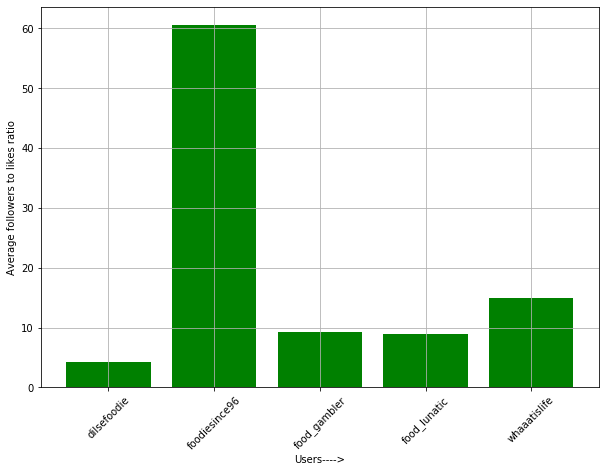

In [100]:
plt.figure(figsize=(10,7))
plt.bar(topuser, ratio, color='green')
plt.xticks(rotation=45, size=10)
plt.xlabel('Users---->', size=10)
plt.ylabel('Average followers to likes ratio', size=10)
plt.yticks(size=10)
plt.grid()
plt.show()
